In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, classification_report)
from sklearn.linear_model import LogisticRegression
import joblib

ЭТАП 1: Анализ данных (EDA)

In [2]:
#1.	Загрузить CSV и вывести первые 10 строк.
df = pd.read_csv('/content/loan_data (2).csv')
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [3]:
#2.	Посмотреть .info() и .shape.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [4]:
df.shape

(45000, 14)

In [5]:
#3.	Проверить уникальные значения по object-признакам.
df.select_dtypes(include='object').nunique()

,0
person_gender,2
person_education,5
person_home_ownership,4
loan_intent,6
previous_loan_defaults_on_file,2


In [6]:
object_columns = ['person_gender', 'person_education',
                  'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

for i in object_columns:
  print(f'{i}: {df[i].unique()}')

person_gender: ['female' 'male']
person_education: ['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']
person_home_ownership: ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent: ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
previous_loan_defaults_on_file: ['No' 'Yes']


In [7]:
df['person_age'] = df['person_age'].astype(int)

In [8]:
#4.	Оставить только выбранные 7 признаков + целевую переменную.
new_df = df[['person_age', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_int_rate', 'credit_score', 'loan_status']]

In [9]:
print(df.shape)
print(new_df.shape)

(45000, 14)
(45000, 8)


In [10]:
#5.	Сохранить облегчённый датасет в loan_clean.csv.
new_df.to_csv('loan_clean.csv', index=False)

In [11]:
#6.	Посчитать средний доход, возраст, стаж.
mean_income = df['person_income'].mean().round()
print(f'средняя доход: {mean_income}')

средняя доход: 80319.0


In [12]:
mean_age = df['person_age'].mean().round()
print(f'средняя восрост: {mean_age}')

средняя восрост: 28.0


In [13]:
mean_exp = df['person_emp_exp'].mean().round()
print(f'средняя стаж: {mean_exp}')

средняя стаж: 5.0


In [14]:
df[['person_income', 'person_age', 'person_emp_exp']]

,person_income,person_age,person_emp_exp
0,71948.0,22,0
1,12282.0,21,0
2,12438.0,25,3
3,79753.0,23,0
4,66135.0,24,1
...,...,...,...
44995,47971.0,27,6
44996,65800.0,37,17
44997,56942.0,33,7
44998,33164.0,29,4


In [15]:
#7.	Сколько заемщиков имеют кредитный балл < 600?
(df['credit_score'] < 600).sum()

np.int64(10828)

In [16]:
[df['credit_score'] < 600]

[0         True
 1         True
 2        False
 3        False
 4         True
          ...  
 44995    False
 44996    False
 44997    False
 44998    False
 44999    False
 Name: credit_score, Length: 45000, dtype: bool]

In [17]:
#8.	Распределение по типу жилья (person_home_ownership) — value_counts().
df['person_home_ownership'].value_counts()

,count
person_home_ownership,
RENT,23443
MORTGAGE,18489
OWN,2951
OTHER,117


In [18]:
df['person_home_ownership'].value_counts(normalize=True).round(3)

,proportion
person_home_ownership,
RENT,0.521
MORTGAGE,0.411
OWN,0.066
OTHER,0.003


In [19]:
#9.	Средняя ставка и сумма кредита по группам loan_status.
df.groupby('loan_status')[['loan_int_rate', 'loan_amnt']].mean().round()

,loan_int_rate,loan_amnt
loan_status,,
0,10.0,9220.0
1,13.0,10856.0


In [20]:
#10.	Кол-во заявителей с опытом работы 0 лет.
(df['person_emp_exp'] == 0).sum()

np.int64(9566)

In [21]:
[df['person_emp_exp'] == 0]

[0         True
 1         True
 2        False
 3         True
 4        False
          ...  
 44995    False
 44996    False
 44997    False
 44998    False
 44999    False
 Name: person_emp_exp, Length: 45000, dtype: bool]

In [22]:
#11.	Сколько заемщиков берут кредит более чем на половину дохода (loan_percent_income > 0.5)?
(df['loan_percent_income'] > 0.5).sum()

np.int64(55)

In [23]:
df[df['loan_percent_income'] > 0.5]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
4,24,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
36,22,female,Bachelor,58868.0,0,RENT,30000.0,EDUCATION,18.39,0.51,2.0,606,No,1
460,24,male,Associate,22684.0,0,OWN,13000.0,PERSONAL,7.88,0.57,3.0,640,No,1
493,23,male,Bachelor,43042.0,1,RENT,22250.0,DEBTCONSOLIDATION,12.69,0.52,3.0,678,No,1
535,22,male,High School,38473.0,0,RENT,21250.0,DEBTCONSOLIDATION,12.42,0.55,3.0,599,No,1
571,21,female,Associate,24468.0,0,MORTGAGE,15000.0,EDUCATION,9.64,0.61,2.0,548,No,1
577,26,male,High School,32325.0,4,RENT,20050.0,EDUCATION,9.76,0.62,2.0,652,No,1
583,23,female,High School,39416.0,0,RENT,20000.0,DEBTCONSOLIDATION,12.61,0.51,4.0,593,No,1
640,22,female,Associate,24993.0,1,MORTGAGE,16600.0,PERSONAL,9.76,0.66,3.0,634,Yes,0
894,21,male,Associate,28367.0,0,OWN,15000.0,EDUCATION,8.94,0.53,2.0,600,Yes,0


In [24]:
#12.	Группировка по person_home_ownership — средний loan_int_rate.
df.groupby('person_home_ownership')['loan_int_rate'].mean()

,loan_int_rate
person_home_ownership,
MORTGAGE,10.557747
OTHER,12.032991
OWN,10.827231
RENT,11.378069


Визуализация

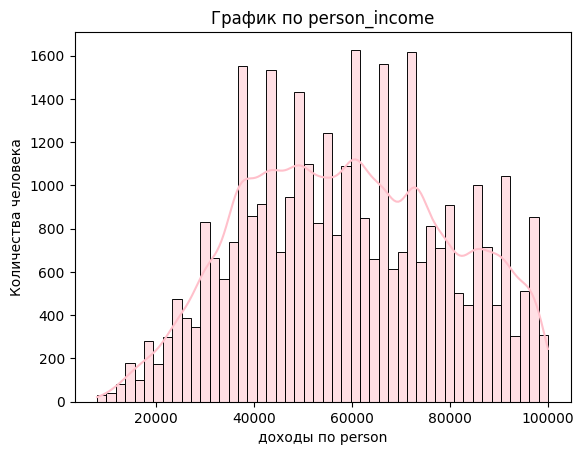

In [25]:
#13.	Hist / distplot по: o	person_income, credit_score, loan_int_rate
sns.histplot(data=df[df['person_income'] < 100000], x='person_income', color='pink', kde=True)
plt.title('График по person_income')
plt.xlabel('доходы по person')
plt.ylabel('Количества человека')
plt.savefig('person_income_hisplot.png')
plt.show()

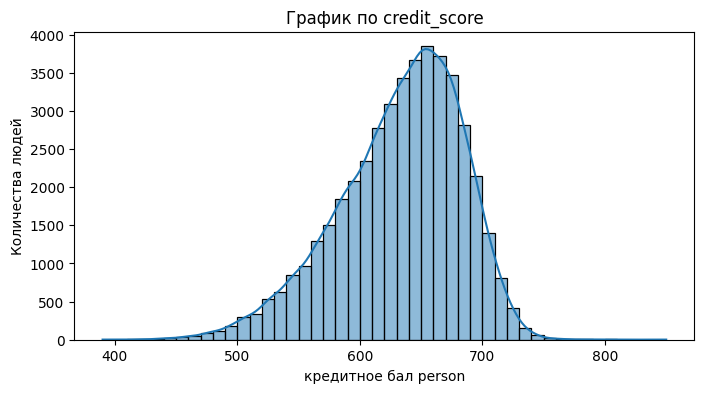

In [26]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='credit_score', binwidth=10, kde=True)
plt.title('График по credit_score')
plt.xlabel('кредитное бал person')
plt.ylabel('Количества людей')
plt.savefig('credit_score_hisplot.png')
plt.show()

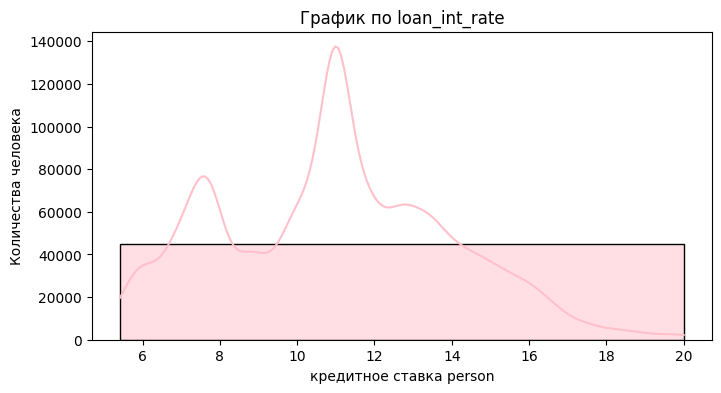

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='loan_int_rate', color='pink', binwidth=10, kde=True)
plt.title('График по loan_int_rate')
plt.xlabel('кредитное cтавка person')
plt.ylabel('Количества человека')
plt.savefig('loan_int_rate_hisplot.png')
plt.show()

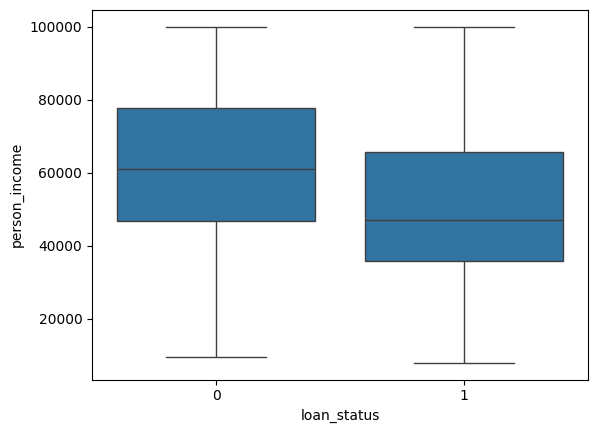

In [28]:
#14.	Boxplot: loan_status vs person_income
sns.boxplot(data=df[df['person_income'] < 100000], x='loan_status', y='person_income')
plt.show()

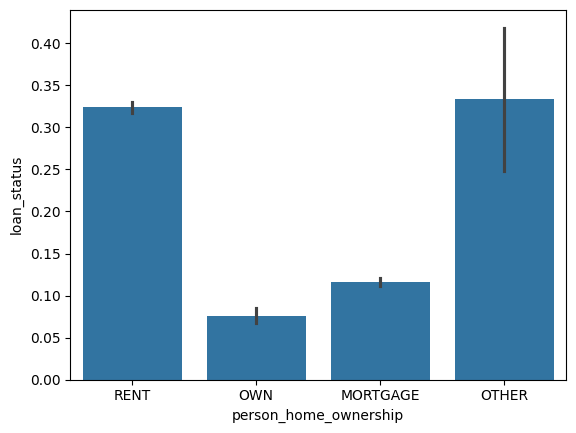

In [29]:
#15.	Barplot: loan_status vs person_home_ownership
sns.barplot(data=df, x='person_home_ownership', y='loan_status')
plt.show()

<Axes: >

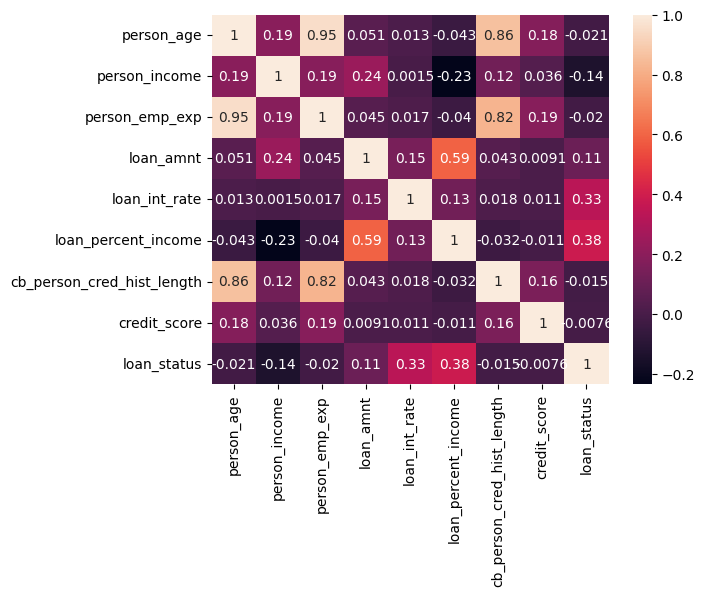

In [30]:
#16.	Heatmap корреляций числовых признаков
sns.heatmap(data=df.select_dtypes(exclude='object').corr(), annot=True)

In [31]:
#17.Pairplot по числовым признакам
cols = ['person_emp_exp', 'credit_score', 'loan_status']

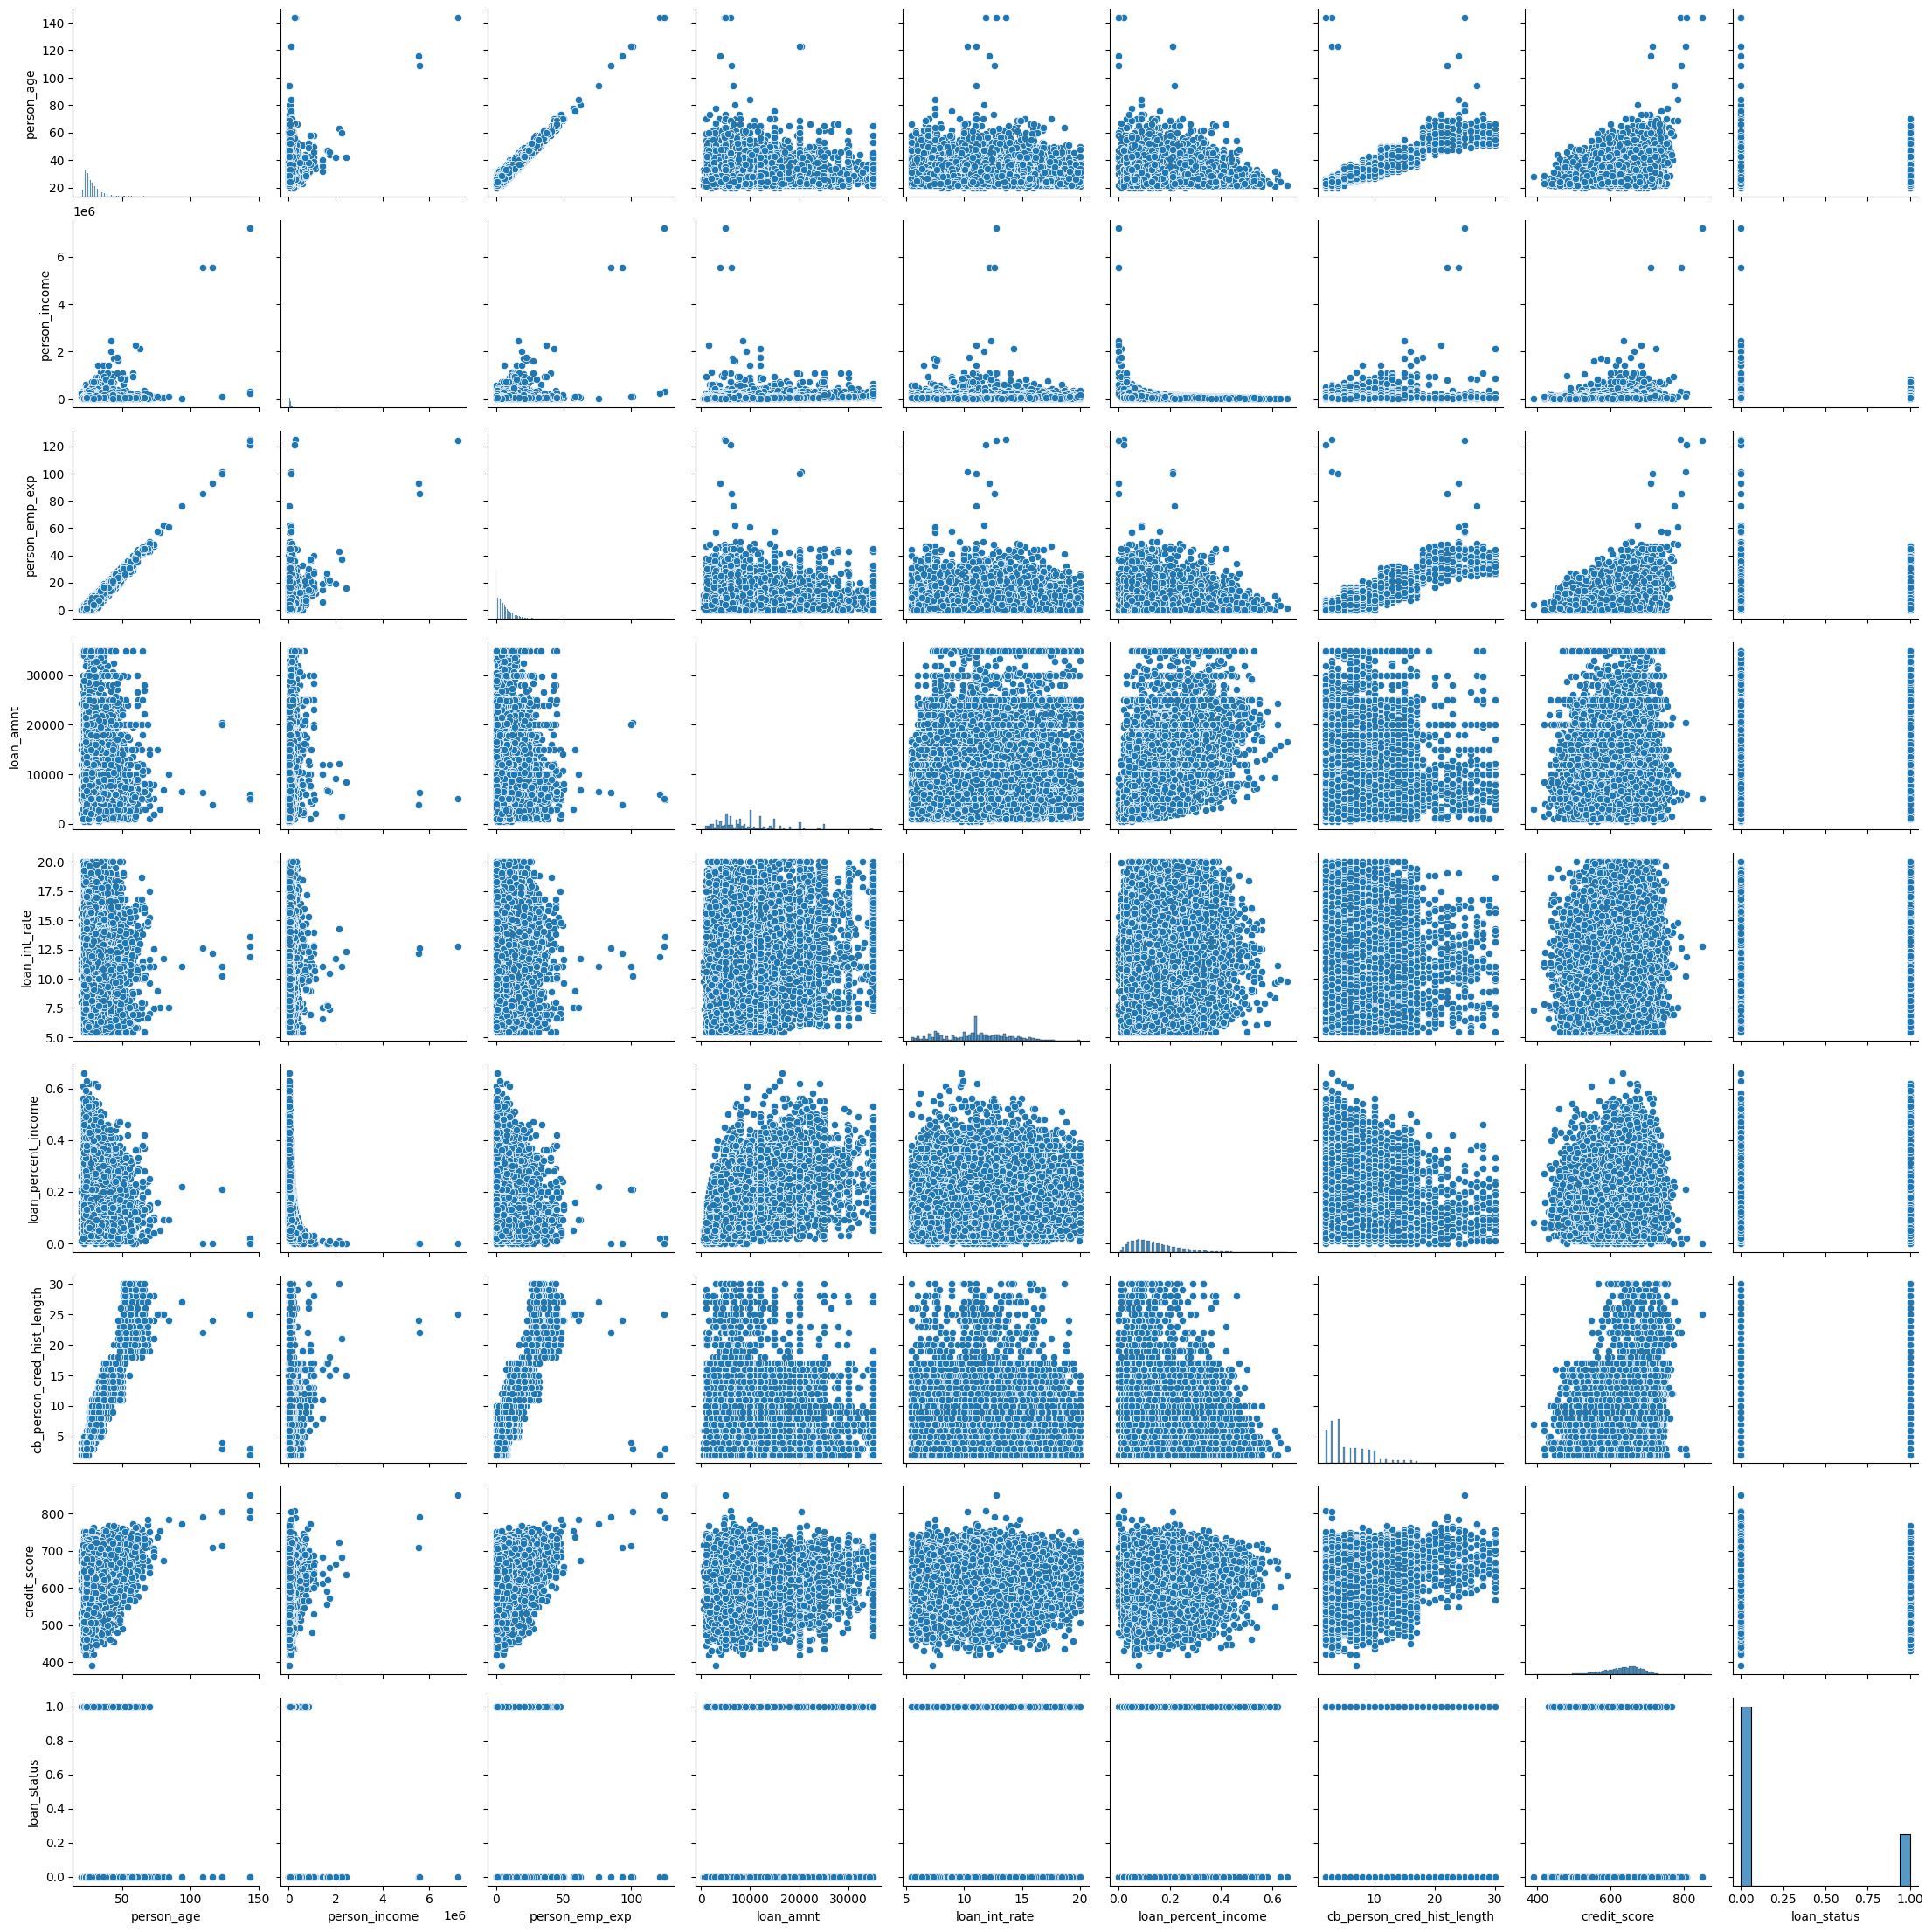

In [32]:
 #17.Pairplot по числовым признакам
sns.pairplot(data=df)
plt.show()


In [33]:
#18.	Проверка пропущенных значений и заполнение (или удаление).
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [34]:
#19.Кодировка категориальных признаков (OneHotEncoder или LabelEncoder): person_home_ownership
df = pd.get_dummies(df, columns=['person_gender','person_education', 'person_home_ownership',
                                 'loan_intent', 'previous_loan_defaults_on_file'],
                    drop_first=True).astype(int)

In [35]:
df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16,0,3,561,1,0,...,1,0,0,1,0,0,0,1,0,0
1,21,12282,0,1000,11,0,2,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25,12438,3,5500,12,0,3,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23,79753,0,35000,15,0,2,675,1,0,...,0,0,0,1,0,0,1,0,0,0
4,24,66135,1,35000,14,0,4,586,1,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,47971,6,15000,15,0,3,645,1,1,...,0,0,0,1,0,0,1,0,0,0
44996,37,65800,17,9000,14,0,11,621,1,0,...,0,0,0,1,0,1,0,0,0,0
44997,33,56942,7,2771,10,0,10,668,1,1,...,0,0,0,1,0,0,0,0,0,0
44998,29,33164,4,12000,13,0,6,604,1,1,...,0,0,0,1,1,0,0,0,0,0


In [36]:
#20.Масштабирование числовых признаков (StandardScaler).

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.drop(columns=['loan_status']))

In [37]:
#21.Разделение X и y (где y = loan_status).
x = scaled_data
y = df['loan_status']

In [38]:
#22.train/test split (80/20).
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ЭТАП 3: Логистическая регрессия

In [39]:
#23.Обучить LogisticRegression() на обучающей выборке.

log_model = LogisticRegression()

In [40]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [41]:
#24.Предсказать на тестовой выборке.
y_pred = log_model.predict(x_test)

In [42]:
#25.Посчитать метрики:

accuracy_score(y_pred, y_test)

0.8836666666666667

In [43]:
#Accuracy
round(accuracy_score(y_pred, y_test) * 100, 2)

88.37

In [44]:
#Recal
round(recall_score(y_pred, y_test), 2)

0.74

In [45]:
#F1-score
round(f1_score(y_pred, y_test), 2)

0.74

In [46]:
#F1-score
round(f1_score(y_pred, y_test), 2)

0.74

In [47]:
#27.Сохранить модель (joblib или pickle).
import joblib

joblib.dump(log_model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [48]:
df

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,...,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16,0,3,561,1,0,...,1,0,0,1,0,0,0,1,0,0
1,21,12282,0,1000,11,0,2,504,0,0,...,0,0,1,0,1,0,0,0,0,1
2,25,12438,3,5500,12,0,3,635,1,0,...,0,0,0,0,0,0,1,0,0,0
3,23,79753,0,35000,15,0,2,675,1,0,...,0,0,0,1,0,0,1,0,0,0
4,24,66135,1,35000,14,0,4,586,1,1,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27,47971,6,15000,15,0,3,645,1,1,...,0,0,0,1,0,0,1,0,0,0
44996,37,65800,17,9000,14,0,11,621,1,0,...,0,0,0,1,0,1,0,0,0,0
44997,33,56942,7,2771,10,0,10,668,1,1,...,0,0,0,1,0,0,0,0,0,0
44998,29,33164,4,12000,13,0,6,604,1,1,...,0,0,0,1,1,0,0,0,0,0


In [49]:
df.columns

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'loan_status', 'person_gender_male',
       'person_education_Bachelor', 'person_education_Doctorate',
       'person_education_High School', 'person_education_Master',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'previous_loan_defaults_on_file_Yes'],
      dtype='object')